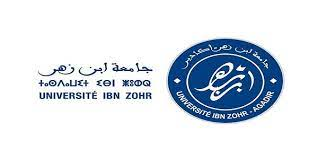<center><h1>Analyse des données mondiales sur le COVID 19</h1></center>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

<b>pandas aide à charger le fichier de l'ensemble de données qui est au format csv

In [ ]:
covid = pd.read_csv('full_grouped.csv')

<b>La ligne ci-dessous affiche les 3 premiers enregistrements de l'ensemble de données

In [ ]:
covid.head(5)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


<b> Les Informations de Dataset

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


<b>Des Statistiques Descriptives

In [ ]:
covid.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


<b>Pour obtenir les dimensions du DataFrame

In [ ]:
covid.shape

(35156, 10)

<b>NETTOYAGE DES DONNÉES

In [ ]:
covid.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

<b>Renommer le nom de la colonne pour la colonne pays/région

In [ ]:
covid = covid.rename(columns = {'Country/Region':'Country'})
covid.columns

Index(['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

<b>Quelle est la répartition en pourcentage des cas entre les différentes régions de l’OMS ?

In [ ]:
Who_regions = covid.groupby('WHO Region')['Confirmed'].sum().sort_values()
Who_regions

WHO Region
Africa                    21791827
Western Pacific           26374411
South-East Asia           55118365
Eastern Mediterranean     74082892
Europe                   248879793
Americas                 402261194
Name: Confirmed, dtype: int64

In [ ]:
gray_style = {
    'axes.facecolor': '#E5E5E5',
    'axes.edgecolor': '#E5E5E5',
    'axes.labelcolor': 'white',
    'figure.facecolor': '#222222',
    'grid.color': 'white',
    'text.color': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white'
}

<b>Répartition des cas de COVID dans les régions de l'OMS

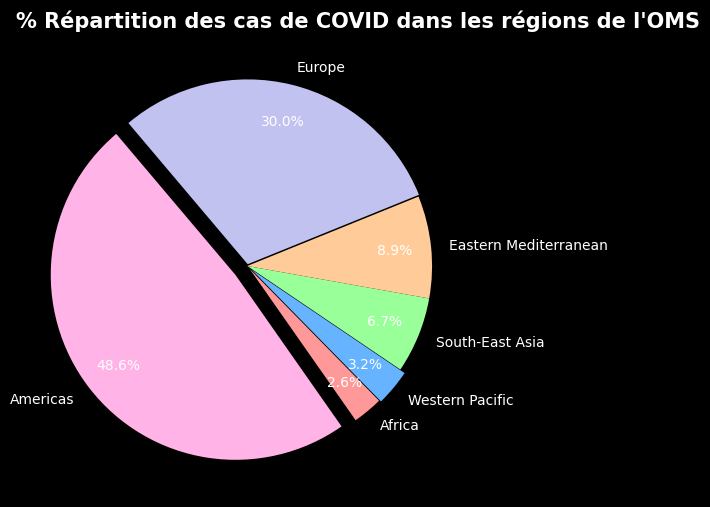

In [ ]:
plt.style.use('dark_background')
who_regions = covid.groupby('WHO Region')['Confirmed'].sum().sort_values()
explode = [0.02, 0.03, 0, 0, 0.01, 0.08]

# Couleurs personnalisées
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

plt.figure(figsize=(10, 6))
plt.pie(who_regions.values, explode=explode, labels=who_regions.index,
        autopct='%1.1f%%', pctdistance=0.8, startangle=305,
        colors=custom_colors, textprops={'fontsize': 10})
plt.title("% Répartition des cas de COVID dans les régions de l'OMS", fontsize=15, weight='bold', loc='left')
plt.show()


<b>Interprétation</b>

À partir du diagramme circulaire ci-dessus, nous pouvons observer qu'avec 48,6 % la région américaine a le plus grand nombre de cas confirmés et qu'avec 2,6 % la région africaine a le moins de cas confirmés.

<b>Comment la tendance mondiale des cas de covid a-t-elle évolué au fil du temps ?

In [ ]:
grouped_data_dates = covid.groupby('Date').agg({'Confirmed': 'sum',
                                                'Deaths': 'sum',
                                                'Recovered': 'sum',
                                               'Active':'sum',
                                               'New cases':'sum',
                                               'New deaths':'sum',
                                               'New recovered':'sum'}).reset_index()
grouped_data_dates.tail()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721
187,2020-07-27,16480485,654036,9468087,6358362,228693,5415,174623


<b>Interprétation</b>

Les cas confirmés ont commencé à croître de façon exponentielle au mois de mars 2020 et ont atteint 1,6 million en août 2020. Le nombre de décès a atteint environ 0,2 million début août 2020. Le nombre de cas guéris était de 1 million fin juin. 2020. À partir du graphique, nous pouvons observer que les cas actifs suivent le même schéma de ligne de tendance des cas confirmés et qu'en août 2020, ces cas actifs s'élevaient au total à 0,60 million.

<b>Quels sont les 10 principaux pays avec le plus grand nombre de cas confirmés, de décès et de cas guéris ?

In [ ]:
country_grouped = covid.groupby('Country').max()
country_grouped.sample(5)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
Country,,,,,,,,,
San Marino,2020-07-27,699,42,657,475,54,6,55,Europe
Timor-Leste,2020-07-27,24,0,0,24,10,0,0,South-East Asia
Ecuador,2020-07-27,81161,5532,34896,40733,11536,410,14443,Americas
Cambodia,2020-07-27,226,0,147,88,31,0,15,Western Pacific
Sudan,2020-07-27,11424,720,5939,4778,410,38,592,Eastern Mediterranean


<b>Les 10 pays avec le plus grand nombre de cas confirmés<br>
<b>Les 10 pays avec le plus grand nombre de décès<br>
<b>Les 10 pays avec le plus grand nombre de guérisons

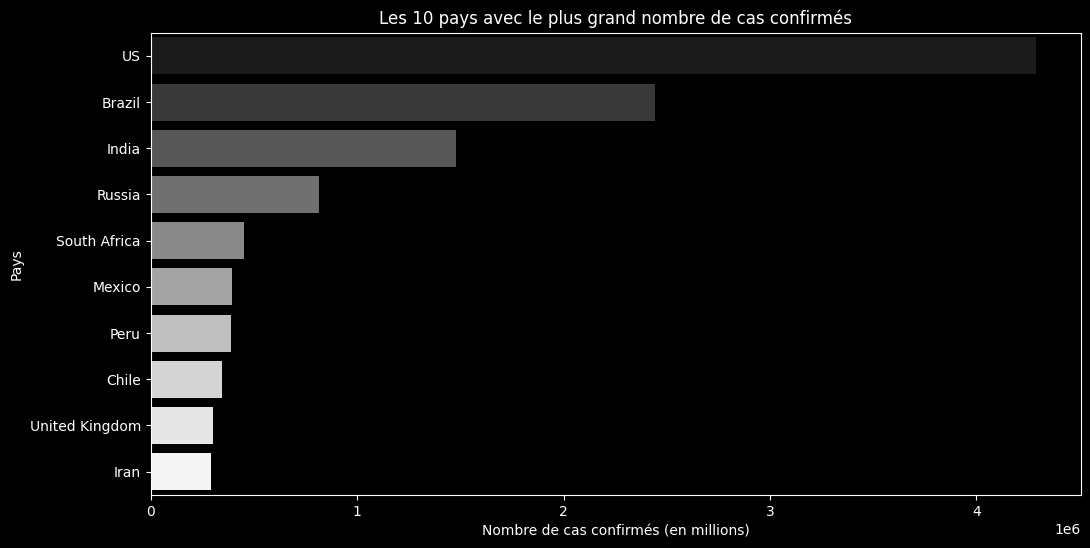

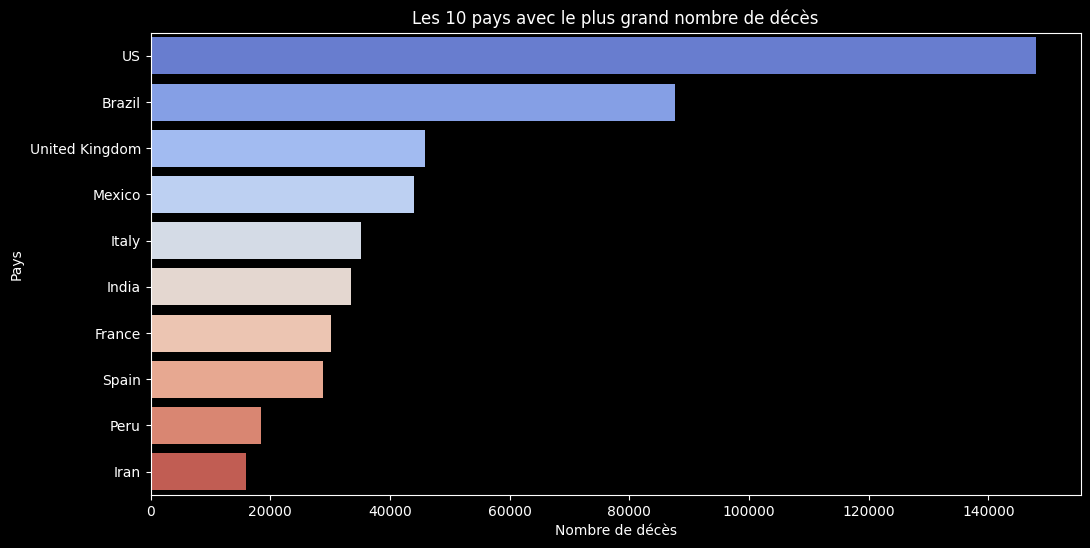

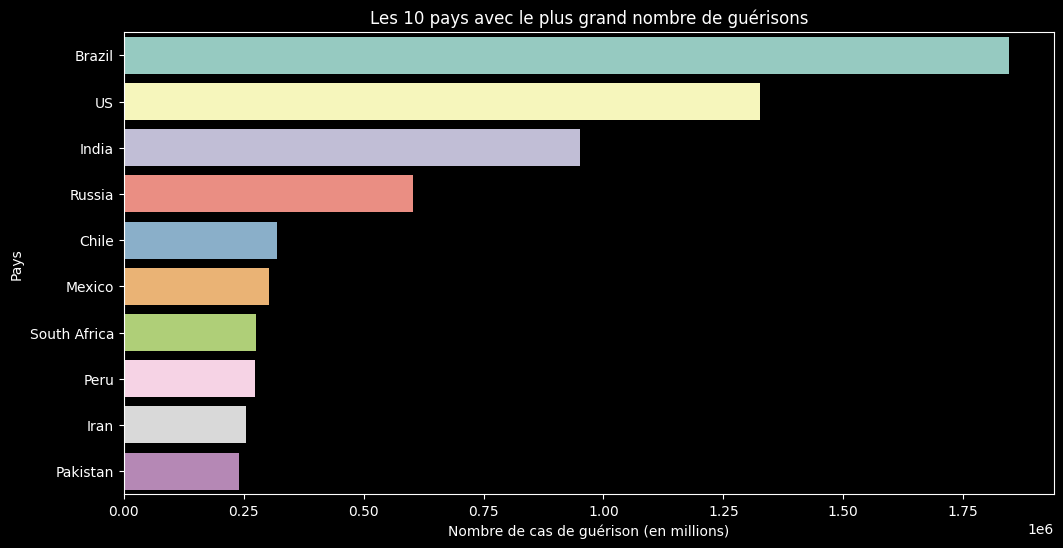

In [ ]:
# Les 10 pays avec le plus grand nombre de cas confirmés
top10_confirmed = country_grouped.nlargest(10, 'Confirmed')

# Bar chart pour les cas confirmés
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')
sns.barplot(x=top10_confirmed['Confirmed'].sort_values(ascending=False), y=top10_confirmed.index, palette='Greys_r')  # Utilise la palette 'Greys_r' pour les tons de gris inversés
plt.title('Les 10 pays avec le plus grand nombre de cas confirmés')
plt.xlabel('Nombre de cas confirmés (en millions)')
plt.ylabel('Pays')
plt.show()

# Les 10 pays avec le plus grand nombre de décès
top10_deaths = country_grouped.nlargest(10, 'Deaths')

# Bar chart pour les décès
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')
sns.barplot(x=top10_deaths['Deaths'].sort_values(ascending=False), y=top10_deaths.index, palette='coolwarm')  # Utilise la palette 'coolwarm' pour les tons de bleu à rouge
plt.title('Les 10 pays avec le plus grand nombre de décès')
plt.xlabel('Nombre de décès')
plt.ylabel('Pays')
plt.show()

# Les 10 pays avec le plus grand nombre de guérisons
top10_recovered = country_grouped.nlargest(10, 'Recovered')

# Bar chart pour les guérisons
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')
sns.barplot(x=top10_recovered['Recovered'].sort_values(ascending=False), y=top10_recovered.index, palette='Set3')  # Utilise la palette 'Set3' pour une variété de couleurs
plt.title('Les 10 pays avec le plus grand nombre de guérisons')
plt.xlabel('Nombre de cas de guérison (en millions)')
plt.ylabel('Pays')
plt.show()


<b>Interprétation</b>

Les États-Unis comptent le plus grand nombre de cas confirmés, supérieurs à 4 millions. Même dans la liste du plus grand nombre de décès, les États-Unis arrivent en tête de liste, avec environ 1,45 000 décès. Le Brésil compte le plus grand nombre de cas guéris avec 1,8 million.


<b>Existe-t-il une corrélation entre les cas confirmés, les décès et les cas guéris ?

In [ ]:
correlation_matrix = covid[['Confirmed','Deaths','Recovered']].corr()
correlation_matrix

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.912016,0.894418
Deaths,0.912016,1.000000,0.761093
Recovered,0.894418,0.761093,1.000000


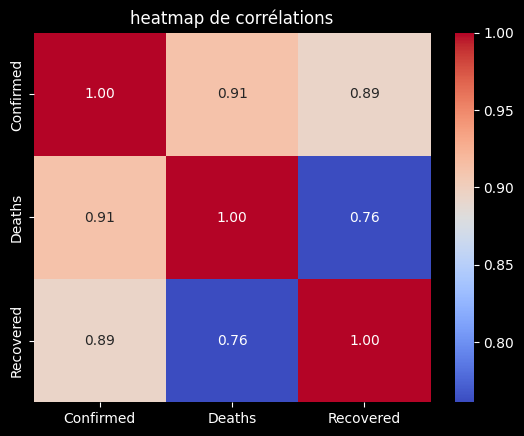

In [ ]:
plt.style.use('dark_background')
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.2f')
plt.title('heatmap de corrélations')
plt.show()

<b>Interprétation</b>

Il existe une très forte corrélation entre le nombre de cas confirmés et le nombre de décès. Cela suggère qu’à mesure que le nombre de cas confirmés augmente, le nombre de décès a également tendance à augmenter. Le nombre de guérisons augmentera à mesure que le nombre de cas confirmés augmentera avec une corrélation de 0,89. Même s’il y a des guérisons, il y aura une corrélation de 0,76 avec les décès des cas guéris.

<b>CONCLUSION</b>

La tendance mondiale des cas de COVID-19 a montré une augmentation initiale, atteignant des pics de cas confirmés, de décès et de guérisons au fil du temps.
Les principaux pays comptant le plus grand nombre de cas confirmés ont été identifiés, fournissant ainsi un aperçu des régions les plus touchées.
Les principaux pays comptant le plus grand nombre de cas confirmés ont été identifiés, fournissant ainsi un aperçu des régions les plus touchées.
La répartition quotidienne des nouveaux cas, des décès et des guérisons a été visualisée pour identifier les tendances et les fluctuations au fil du temps.
Des coefficients de corrélation ont été calculés pour explorer les relations entre les cas confirmés, les décès et les cas guéris.
Sur la base de l'analyse, il est recommandé de se concentrer sur les pays avec un nombre élevé de cas confirmés et de décès pour des mesures de santé publique et une allocation de ressources efficaces.
L'analyse est basée sur les données disponibles et les chiffres réels peuvent être influencés par les capacités de test, les pratiques de reporting et d'autres facteurs.